In [1]:
using Plots, LaTeXStrings, Interact;

<script type="text/text/x-mathjax-config">
MathJax.Hub.Config({
#    jax: ["input/TeX","output/HTML-CSS"],
    displayAlign: "right",
    displayIndent: 2em
});
</script>

# A32 Landau Theorie des Van der Waals Gases

Bei gegebenem $T,P$ wird im Gleichgewicht dasjenige (spezifische) Volumen $V(T,P)$ bzw. $v(T,P)$ angenommen, welches die __Gibbs'sche Freie Energie__ $G$ minimiert. Da per Definition

\begin{equation} G(T,P) = F(T,V(T,P)) + PV(T,P) \end{equation}

gilt, können wir auch schreiben 

$$G(T,P) = \min_V \left\{ F(T,V) + PV \right\}$$

Das motiviert nach den Minima der variationellen freien Energie $F+PV$ zu suchen. Um das Verhalten in der Nähe des kritischen Punktes zu untersuchen, bietet sich eine Taylorentwicklung nach Potentenzen von $\Delta v = \tfrac{v-v_c}{v_c}$ an. Aus der Vorlesung wissen wir, dass das kritische spezifische Volumen durch $v_c = 3b$ und die krit. Temp. durch $T_c=8a/27b = 9a/8v_c$ gegeben ist.

---

Koeffizienten, Freie Energie und kritischer Druck als Funktionen von Temperatur, Druck, kritischem Druck/Temperatur.

Setze standardmäßig $T_c = P_c = 1$.

In [3]:
A(p,T;vc=1,Tc=1) = p*vc + 9/8*Tc - 3/2*T;

In [4]:
B(T;vc=1,Tc=1) = 9/8*(T-Tc);

In [5]:
C(T;vc=1,Tc=1) = (9/8)^2*T - 9/8*Tc;

In [6]:
# variationelle Gibbsche freie Energie pro Teilchen
g(dv,p,T;vc=1,Tc=1) = A(p,T;vc=vc,Tc=Tc)*dv + B(T;vc=vc,Tc=Tc)*(dv^2-dv^3) + C(T;vc=vc,Tc=Tc)*dv^4;
# 1. und 2. Ableitung
dg(dv,p,T;vc=1,Tc=1) = A(p,T;vc=vc,Tc=Tc) + B(T;vc=vc,Tc=Tc)*(2*dv-3*dv^2) + 4*C(T;vc=vc,Tc=Tc)*dv^3;
ddg(dv,p,T;vc=1,Tc=1) = B(T;vc=vc,Tc=Tc)*(2-6*dv) + 12*C(T;vc=vc,Tc=Tc)*dv^2;

In [7]:
Pc(vc=1,Tc=1) = 3/8*Tc/vc;

---

### Druck interaktiv verändern

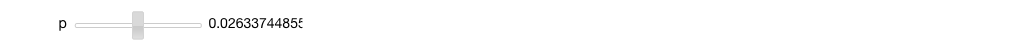

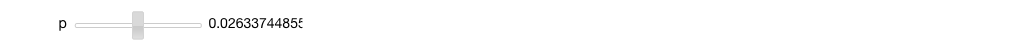

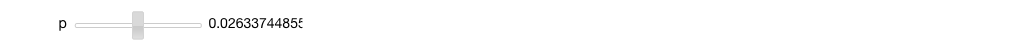

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.026337448559670778, nactions=1),"p",0.026337448559670778,"0.026337448559670778",Interact.OptionDict(DataStructures.OrderedDict("0.0032921810699588472"=>0.00329218,"0.003621399176954732"=>0.0036214,"0.0039506172839506165"=>0.00395062,"0.004279835390946502"=>0.00427984,"0.004609053497942386"=>0.00460905,"0.004938271604938271"=>0.00493827,"0.005267489711934156"=>0.00526749,"0.00559670781893004"=>0.00559671,"0.005925925925925926"=>0.00592593,"0.00625514403292181"=>0.00625514…),Dict(0.00329218=>"0.0032921810699588472",0.0207407=>"0.02074074074074074",0.0398354=>"0.03983539094650205",0.025679=>"0.025679012345679007",0.015144=>"0.015144032921810697",0.0457613=>"0.04576131687242798",0.00526749=>"0.005267489711934156",0.00855967=>"0.008559670781893004",0.0253498=>"0.025349794238683124",0.0273251=>"0.027325102880658432"…)),Any[],Any[],true,"horizontal")

In [8]:
# Setze Parameter
a=2
b=1.5
vc=3*b
Tc=8/27*a/b

# Definiere Bereiche zum Plotten
vv = linspace(-4,3,200)
TT = [10/11*Tc, Tc, 11/10*Tc]
lwT = [2 4 2]
lsT = [:dash :solid :dash]
#Waehle Plotly backend => Interaktive Plots.
plotly(size=(1024,768));
@manipulate for p in Pc(vc,Tc) *(1/10:0.01:3/2)
    plot(vv,
      [dv->g(dv,p,T,vc=vc,Tc=Tc)+1/4 for T in TT],
       ylim=(-1/2,1/2),
       xlabel=L"$\Delta v$",
       ylabel="g",
       lab=[join(["T=",rationalize(T/Tc),"*Tc"],"") for T in TT'],
        linewidth = lwT,
        linestyle = lsT
    )
    plot!(vv,
        [dv->dg(dv,p,T,vc=vc,Tc=Tc) for T in [Tc]],
        lab="g'@Tc"
    )
    plot!([cbrt(-A(p,Tc;vc=vc,Tc=Tc)/4/C(Tc;vc=vc,Tc=Tc))],[0],line=false,marker=(:circle,5,:red),lab="")
end

### Animation erstellen und als GIF speichern.
* ImageMagick ist installiert und im Pfad.

__oder__

* Julia Paket ImageMagick.jl ist installiert. Dann bitte die folgende Zelle ausführen


In [30]:
using ImageMagick

In [33]:
# Setze Parameter
a=2
b=1.5
vc=3*b
Tc=8/27*a/b

# Definiere Bereiche zum Plotten
vv = linspace(-4,3,200)
TT = [10/11*Tc, Tc, 11/10*Tc]
PP = [1/2, 3/4, 1., 3/2]
pyplot();
plt = [(:ylim,(-1/2,1/2)),
       (:xlabel,L"$\Delta v$"),
       (:ylabel,"g"),
       (:linewidth,[2 4 2]),
       (:linestyle, [:dash :solid :dash])
]
anim = @animate for p in Pc(vc,Tc)*(1/2:0.01:3/2)
    plot(vv,
      [dv->g(dv,p,T,vc=vc,Tc=Tc)+1/4 for T in TT],
        legend=false
       ; plt...
    )
#     plot!(vv,
#         [dv->dg(dv,p,T,vc=vc,Tc=Tc) for T in [Tc]]
#     )
    plot!([cbrt(-A(p,Tc;vc=vc,Tc=Tc)/4/C(Tc;vc=vc,Tc=Tc))],[0],line=false,marker=(:circle,5,:red))
    plot!([cbrt(-A(p,Tc;vc=vc,Tc=Tc)/4/C(Tc;vc=vc,Tc=Tc))],dv->ddg(dv,p,Tc,vc=vc,Tc=Tc),line=false,marker=(:star,5,:green))
    
end
gif(anim, "vdw.gif", fps=15)

INFO: Saved animation to /Network/Servers/mac25.thp.uni-koeln.de/Volumes/RAID/skleinbo/Documents/Teaching/StatMech2016/vdw.gif


Plots.AnimatedGif("/Network/Servers/mac25.thp.uni-koeln.de/Volumes/RAID/skleinbo/Documents/Teaching/StatMech2016/vdw.gif")

### Statische Plots


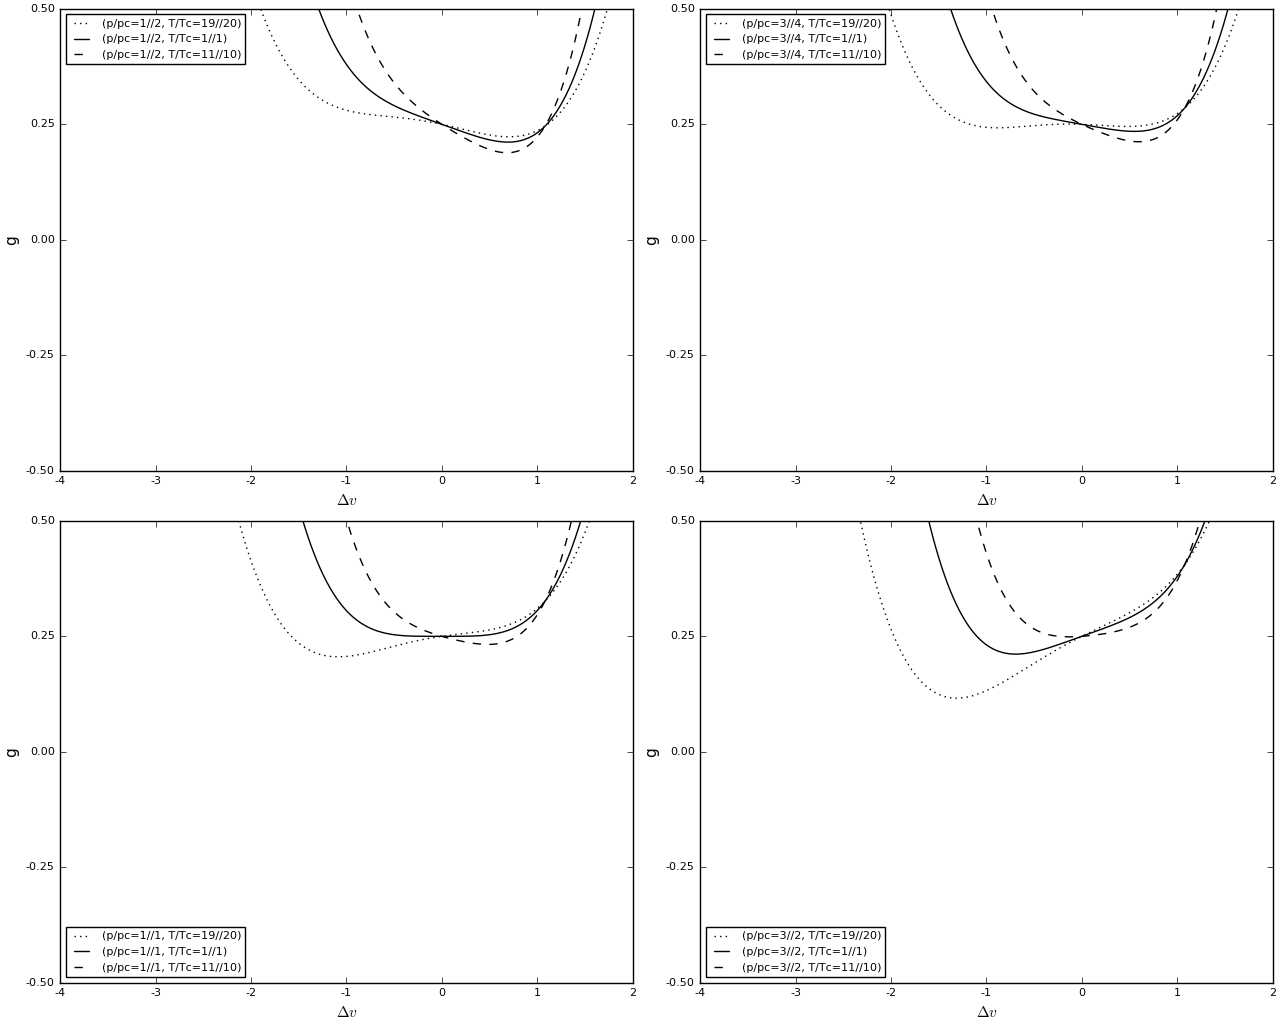

In [11]:
a=2
b=1.5
vc=3*b
Tc=8/27*a/b

vv = linspace(-4,2,200) # Volumina
TT = [95/100*Tc,Tc,11/10*Tc] #Temperaturen

pyplot();
plt = plot(layout=4,ylim=(-1/2,1/2),size=(1280,1024),
    xlabel=L"$\Delta v$",
    ylabel="g",
    grid=false,
    )

for p in enumerate([1/2,3/4,1.,3/2])
    plot!(plt[p[1]],
        vv,[dv->g(dv,p[2]*Pc(vc,Tc),T,vc=vc,Tc=Tc)+1/4 for T in TT],
        lab=[ join(["(p/pc=",rationalize(p[2]),", T/Tc=",rationalize(T/Tc),")"],"") for T in TT'],
        linecolor=:black,
        linestyle=[:dot :solid :dash]
        )
end
display(plt)

# A33 Landau Theorie des Ising Ferromagneten

Das Vorgehen ist analog zum vdW-Gas-Flüssig-Übergang. Man entwickelt das entsprechende Potential - hier die _Helmholtz Freie Energie_ $F(T,h) = E - TS$ - in Potenzen des Ordungsparameters am kritischen Punkt. Hier erwartet man dass am kritischen Punkt die Magnetisierung verschwindet.

Im Allgemeinen benötigt man Kenntnis der kanonische Zustandssumme um die Energie zu berechnen. Bis auf Ausnahmen ist das für wechselwirkende Systeme nicht exakt machbar und man muss sich Näherungsmethoden bedienen. Eine davon ist die _Mean-Field-Methode_. Dabei wird die paarweise Wechselwirkung ersetzt durch ein gemitteltes effektives Feld. Dadurch kommt man zu einem lösbaren _Ein_-teilchen Problem

Konkret nähert man die Wechselwirkung 

$$ s_i\left (h + \sum_j Js_j\right ) $$

indem man die Spins $s_j$ - die ja im Prinzip fluktuieren! - durch ihren fixierten Mittelwert ersetzt

$$ s_j \rightarrow \langle s_j \rangle = m. $$

Dabei haben wir ausserdem angenommen, dass sich im Gleichgewicht eine Magnetisierung einstellt die nicht vom Ort abhängt.

_Beachte_: Der tatsächliche Wert von $m$ der sich einstellt ist a priori unbekannt! Man kann nun weiterrechnen und kommt zu einer Gleichung für $m$

$$ m = \frac{1}{N}\sum_i s_i \frac{\exp(-\beta H_{MF})}{Z} = \tanh\left(\beta(Jzm-h)\right)$$

die (nährungsweise) nach $m$ gelöst werden muss, um die sich einstellende Magnetisierung zu erhalten.